# Deep Q-Learning with an Atari-like game - Breakout-v0

### Abstract

This jupyter Notebook is for applying Deep Q Learning to a game - Breakout in the OpenAI Gym Atari environments. With the deep Q-learning algorithm, it learns from actions in the ε-greedy policy, then maximizes the total reward.

In a Breakout game, the player has 3 chances to take action. The player must control a platform to move left and right to bounce a ball. When that ball hits a brick, the brick will disappear, and the ball will bounce and get a score. When the player fails to bounce the ball on the platform, then the player loses that round. It aims to get the highest rewards. The different state, which is s ∈ {1, 2, . . . , 210}. The actions for the player taking, a ∈ {'NOOP', 'FIRE', 'RIGHT', 'LEFT'}. The reward is zero on all transitions except those on which the player reaches bricks, when it is plus score based on different colors.

In the training model, we execute 10000 timestep to get 38 sets of episodes reward score, then the reward trends can be shown by plot function in pyplot module of matplotlib library to make a plot of points Timestep, Reward.

Adapted from [OpenAI Baselines](https://github.com/openai/baselines) in GitHub, [Deep Reinforcement Learning for Atari Games Python Tutorial](https://www.youtube.com/watch?v=hCeJeq8U0lo) in Youtube

### Create Environment with OpenAI Gym

Install gym[atari] which also installs ale-py with Gym.

In [1]:
!pip install tensorflow==2.3.1 gym keras-rl2 gym[atari]

In [2]:
import gym 
import random

Build the environment of the Breakout Game with OPenAI Gym, and declare its states and actions.

In [3]:
env = gym.make('Breakout-v0')
height, width, channels = env.observation_space.shape
actions = env.action_space.n

A.L.E: Arcade Learning Environment (version +a7a216c)
[Powered by Stella]


In [4]:
state_size = env.observation_space.shape

Observe the action and state sizes of the Breakout Game

In [5]:
print("Action size ", actions)
print("State size ", state_size)

Action size  4
State size  (210, 160, 3)


Get meanings of each action to know what actions do the game operates, where each element separately in the list mean
[0] NOOP: do nothing, 
[1] FIRE: fire ball to start game, 
[2] RIGHT: move right, 
[3] LEFT: move left

In [6]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

Show hign values and low values of states

In [7]:
print('states high value:')
print(env.observation_space.high[0])
print(env.observation_space.high[1])
print(env.observation_space.high[2])
print(env.observation_space.high[3])

print('states low value:')
print(env.observation_space.low[0])
print(env.observation_space.low[1])
print(env.observation_space.low[2])
print(env.observation_space.low[3])

states high value:
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 

Import some necessary libraries for the further uses

In [8]:
from baselines.common.atari_wrappers import make_atari, wrap_deepmind
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### Set up parameter for ε-greedy

Alpha also known as the learning rate. α should be in the range of 0 -1. The higher the learning rate, it quickly replaces the new q value. When I chose the hyperparameters of the model, I used the middle value to operate it because we did not how much do it influence our model. Gamma also known as the discounting rate. γ is discounting for past rewards. 

By choosing decay rate and starting epsilon parameters, I introduce a random value for epsilon. For example, if epsilon = 0.5 then we are selecting random actions with 0.5 probability regardless of the actual q value. The decay rate is how much you are updating the Q value with each step. I set it to a low value because I want it fully to exploit and stabilize the policy and setting it too high will prevent it from learning.

In [9]:
total_episodes = 50000        # Total episodes
total_test_episodes = 100     # Total test episodes
max_steps = 99                # Max steps per episode
learning_rate = 0.5           # Learning rate (Alpha)
gamma = 0.9                   # Discounting rate (Gamma)

# Exploration parameters
epsilon = 1.0                 # Exploration rate (Epsilon)
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.01             # Exponential decay rate for exploration prob

Establish a baseline for our RL program with the Breakout-v0.
Simply throughout the 5 episodes run to evaluate its score mean.

In [13]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1,2,3])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()


2021-10-21 23:44:40.058 python[21884:683637] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7ff3da983eb0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-10-21 23:44:40.059 python[21884:683637] Warning: Expected min height of view: (<NSButton: 0x7ff3daa39a30>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-10-21 23:44:40.063 python[21884:683637] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7ff3daa3ab00>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-10-21 23:44:40.066 python[21884:683637] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7ff3f91ac7e0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


Episode:1 Score:3.0
Episode:2 Score:2.0
Episode:3 Score:1.0
Episode:4 Score:2.0
Episode:5 Score:3.0


#### Build the model for Breakout Game Training

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
import numpy as np

Define the model of the Breakout Game, then build it for future testing

In [15]:
def build_model(height, width, channels, actions):
    model = Sequential()
    model.add(Convolution2D(32, (8,8), strides=(4,4), activation='relu', input_shape=(3,height, width, channels)))
    model.add(Convolution2D(64, (4,4), strides=(2,2), activation='relu'))
    model.add(Convolution2D(64, (3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [20]:
model = build_model(height, width, channels, actions)

In [17]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

Set up the deep Q learning agent and conduct ε-greedy policy in the training model

In [18]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=1000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg', 
                   nb_actions=actions, nb_steps_warmup=1000
                  )
    return dqn

In [19]:
del model

Execute 10000 timestep to evaluate each set of episodes reward score

In [21]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-4))
dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

Training for 10000 steps ...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
  271/10000: episode: 1, duration: 6.983s, episode steps: 271, steps per second:  39, episode reward:  2.000, mean reward:  0.007 [ 0.000,  1.000], mean action: 1.472 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  437/10000: episode: 2, duration: 4.161s, episode steps: 166, steps per second:  40, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.464 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  672/10000: episode: 3, duration: 5.799s, episode steps: 235, steps per second:  41, episode reward:  1.000, mean reward:  0.004 [ 0.000,  1.000], mean action: 1.515 [0.000, 3.000],  loss: --, mean_q: --, mean_eps: --
  858/10000: episode: 4, duration: 4.563s, episode steps: 186, steps per second:  41, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.694 [0.000, 3.000],  loss: --, mea

 8739/10000: episode: 34, duration: 340.015s, episode steps: 325, steps per second:   1, episode reward:  2.000, mean reward:  0.006 [ 0.000,  1.000], mean action: 1.166 [0.000, 3.000],  loss: 0.098671, mean_q: 11.453975, mean_eps: 0.228160
 8923/10000: episode: 35, duration: 192.899s, episode steps: 184, steps per second:   1, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.359 [0.000, 3.000],  loss: 0.071442, mean_q: 11.356020, mean_eps: 0.205255
 9285/10000: episode: 36, duration: 377.705s, episode steps: 362, steps per second:   1, episode reward:  3.000, mean reward:  0.008 [ 0.000,  1.000], mean action: 1.249 [0.000, 3.000],  loss: 0.065836, mean_q: 11.227506, mean_eps: 0.180685
 9602/10000: episode: 37, duration: 332.438s, episode steps: 317, steps per second:   1, episode reward:  1.000, mean reward:  0.003 [ 0.000,  1.000], mean action: 1.782 [0.000, 3.000],  loss: 0.062359, mean_q: 11.022525, mean_eps: 0.150130
 9877/10000: episode: 38, duration: 

Quicky test it for 10 episodes. It is helpful for us to review how performance it is without having to browse so many episodes. 

In [22]:
scores = dqn.test(env, nb_episodes=10, visualize=True)
print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...


/opt/anaconda3/lib/python3.8/site-packages/gym/envs/atari/environment.py:255: UserWarning: WARN: We strongly suggest supplying `render_mode` when constructing your environment, e.g., gym.make(ID, render_mode='human'). Using `render_mode` provides access to proper scaling, audio support, and proper framerates.
  logger.warn(
2021-10-22 02:30:32.713 python[21884:683637] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7ff39fb249c0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-10-22 02:30:32.713 python[21884:683637] Warning: Expected min height of view: (<NSButton: 0x7ff3daea88e0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2021-10-22 02:30:32.715 python[21884:683637] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7ff3daeb0a00>) to be less than or equal to 30 but got a height of 32.000000. This e

Episode 1: reward: 0.000, steps: 161
Episode 2: reward: 0.000, steps: 169
Episode 3: reward: 2.000, steps: 242
Episode 4: reward: 4.000, steps: 344
Episode 5: reward: 2.000, steps: 10000
Episode 6: reward: 1.000, steps: 227
Episode 7: reward: 0.000, steps: 10000
Episode 8: reward: 3.000, steps: 327
Episode 9: reward: 0.000, steps: 169
Episode 10: reward: 1.000, steps: 10000
1.3


In [69]:
train_rewards = scores.history['episode_reward']

The plot() function in pyplot module of matplotlib library is used to make a 2D hexagonal binning plot of points Timestep, Reward.

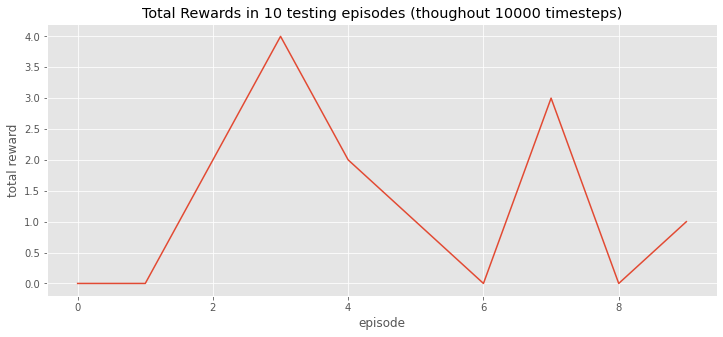

In [79]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# create figure
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1)

# plot total reward history
ax.plot(train_rewards)
ax.set_xlabel('episode')
ax.set_ylabel('total reward')
ax.set_title('Total Rewards in 10 testing episodes (thoughout 10000 timesteps)')
plt.show()

In [72]:
scores_1 = dqn.test(env, nb_episodes=50, visualize=True)

Testing for 50 episodes ...
Episode 1: reward: 0.000, steps: 175
Episode 2: reward: 0.000, steps: 10000
Episode 3: reward: 2.000, steps: 263
Episode 4: reward: 0.000, steps: 168
Episode 5: reward: 0.000, steps: 162
Episode 6: reward: 0.000, steps: 170
Episode 7: reward: 0.000, steps: 10000
Episode 8: reward: 0.000, steps: 10000
Episode 9: reward: 3.000, steps: 356
Episode 10: reward: 0.000, steps: 168
Episode 11: reward: 0.000, steps: 160
Episode 12: reward: 0.000, steps: 162
Episode 13: reward: 1.000, steps: 281
Episode 14: reward: 0.000, steps: 166
Episode 15: reward: 0.000, steps: 162
Episode 16: reward: 1.000, steps: 200
Episode 17: reward: 1.000, steps: 253
Episode 18: reward: 0.000, steps: 10000
Episode 19: reward: 0.000, steps: 176
Episode 20: reward: 0.000, steps: 10000
Episode 21: reward: 10.000, steps: 457
Episode 22: reward: 0.000, steps: 177
Episode 23: reward: 4.000, steps: 363
Episode 24: reward: 0.000, steps: 168
Episode 25: reward: 2.000, steps: 245
Episode 26: reward: 

In [73]:
train_rewards_1 = scores_1.history['episode_reward']

The plot() function in pyplot module of matplotlib library is used to make a plot of points Timestep, Reward.

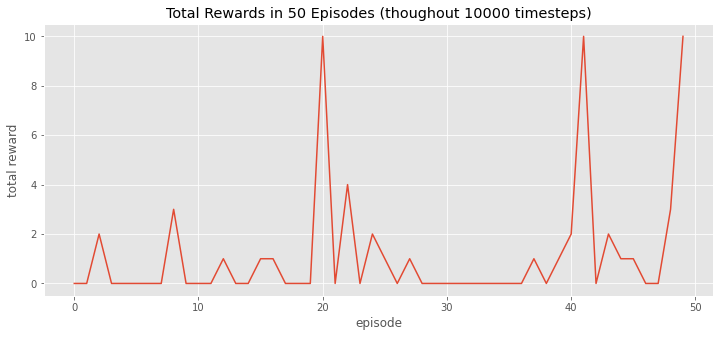

In [80]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# create figure
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1)

# plot total reward history
ax.plot(train_rewards_1)
ax.set_xlabel('episode')
ax.set_ylabel('total reward')
ax.set_title('Total Rewards in 50 Episodes (thoughout 10000 timesteps)')
plt.show()

After training through 10000 timestep, we have not been able to get a very good result because we have not trained more episodes. We need more training to get better and continuous improvement results.

### Reinforcement learning with the conventional greedy policy

For the conventional greedy policy, the parameter epsilon should be 0 which means there is no exploration and always be greedy. 

In [23]:
total_episodes = 50000        # Total episodes
total_test_episodes = 100     # Total test episodes
max_steps = 99                # Max steps per episode
learning_rate = 0.2           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 0                   # Exploration rate
decay_rate = 0.1              # Exponential decay rate for exploration prob

After running episodes simply, we can see that the average of 5 consecutive episodes.

In [24]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1,2,3])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:2.0
Episode:2 Score:2.0
Episode:3 Score:3.0
Episode:4 Score:6.0
Episode:5 Score:1.0


# References

Cited as:

# Copyright and Licensing

BSD 3-Clause License

Copyright (c) 2021, Shu-Ya Hsu
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

In [ ]:
# Copyright (c) Hsu-Ya Hsu.
# Distributed under the terms of the 3-Clause BSD License.

You are free to use or adapt this notebook for any purpose you'd like. However, please respect the [Modified BSD License](https://jupyter.org/governance/projectlicense.html) that governs its use.